# Amazon Reviews Mobile Phones

In [31]:
import smtplib
from matplotlib import style
import seaborn as sns
sns.set(style='ticks', palette='RdBu')
import pandas as pd
import numpy as np
import time
import datetime 
%matplotlib inline
import matplotlib.pyplot as plt



# Read the data

In [32]:
data = pd.read_csv('Amazon_Unlocked_Mobile.csv', encoding='utf-8')
df = data
df.columns = ['ProductName', 'BrandName', 'Price', 'Rating', 'Reviews', 'ReviewVotes']
df.head().T

,0,1,2,3,4
ProductName,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...","""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...","""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...","""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...","""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7..."
BrandName,Samsung,Samsung,Samsung,Samsung,Samsung
Price,199.99,199.99,199.99,199.99,199.99
Rating,5,4,5,4,4
Reviews,I feel so LUCKY to have found this used (phone...,"nice phone, nice up grade from my pantach revu...",Very pleased,It works good but it goes slow sometimes but i...,Great phone to replace my lost phone. The only...
ReviewVotes,1.0,0.0,0.0,0.0,0.0


# Describe the data

In [33]:
data.columns

Index(['ProductName', 'BrandName', 'Price', 'Rating', 'Reviews',
       'ReviewVotes'],
      dtype='object')

In [34]:
data.head(n=2)

,ProductName,BrandName,Price,Rating,Reviews,ReviewVotes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0


In [35]:
df['Price'] = df['Price'].fillna(0)
df['ReviewVotes'] = df['ReviewVotes'].fillna(0)
data.describe()

,Price,Rating,ReviewVotes
count,413840.000000,413840.000000,413840.000000
mean,223.614684,3.819578,1.462454
std,272.380590,1.548216,9.030315
min,0.000000,1.000000,0.000000
25%,78.000000,3.000000,0.000000
50%,139.950000,5.000000,0.000000
75%,269.100000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


# Categorical features

In [36]:
categorical_features = (data.select_dtypes(include=['object']).columns.values)
categorical_features

array(['ProductName', 'BrandName', 'Reviews'], dtype=object)

# Numerical Features

In [37]:
numerical_features = data.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_features

array(['Price', 'Rating', 'ReviewVotes'], dtype=object)

In [38]:
len(list(set(df['ProductName'])))

4410

# Pivot tables

In [39]:
pivot = pd.pivot_table(df,
            values = ['Rating', 'ReviewVotes'],
            index = ['BrandName'], 
                       columns= [],
                       aggfunc=[np.sum, np.mean, np.count_nonzero, np.std], 
                       margins=True).fillna('')
pivot.head(10)

sum                  mean             count_nonzero  \
                       Rating ReviewVotes    Rating ReviewVotes        Rating   
BrandName                                                                       
AKUA                       20         0.0  5.000000    0.000000             4   
AMM Global Enterprises     44         1.0  4.888889    0.111111             9   
ARGOM TECH                  6         0.0  3.000000    0.000000             2   
ASUS                     2165       838.0  4.482402    1.734990           483   
ASUS Computers           2896       831.0  4.027816    1.155772           719   
AT&T                        5         0.0  5.000000    0.000000             1   
ATT                       160        25.0  3.636364    0.568182            44   
Acer                       68        27.0  3.090909    1.227273            22   
Aeku                       10         8.0  5.000000    4.000000             2   
AeroAntenna                 5         0.0  5.000000    0.000000             1   

                                         std              
                       ReviewVotes    Rating ReviewVotes  
BrandName                                                 
AKUA                             0       0.0         0.0  
AMM Global Enterprises           1  0.333333    0.333333  
ARGOM TECH                       0  2.828427         0.0  
ASUS                           185  1.070735    4.754574  
ASUS Computers                 228  1.386085    6.634777  
AT&T                             0                        
ATT                             17  1.792632    0.974028  
Acer                            14  1.715728    1.377777  
Aeku                             1       0.0    5.656854  
AeroAntenna                      0

# Which are the top 10 prominent brands?
And how many ratings do they have?  

In [40]:
pivot = pd.pivot_table(df,
            values = ['Rating', 'ReviewVotes'],
            index =  ['BrandName'],
                       columns= [],
                       aggfunc=[np.sum, np.mean, np.count_nonzero, np.std], 
                       margins=True, fill_value=0).sort_values(by=('count_nonzero', 'Rating'), ascending=False).fillna('')
top_10_brands = pivot.reindex().head(n=11)
top_10_brands

sum                  mean             count_nonzero  \
             Rating ReviewVotes    Rating ReviewVotes        Rating   
BrandName                                                             
All         1330128      499722  3.814873    1.433228        348669   
Samsung      260513       97903  3.962356    1.489087         65747   
BLU          239853       58430  3.792262    0.923824         63248   
Apple        228346      112280  3.924415    1.929674         58186   
LG            86114       23070  3.841460    1.029130         22417   
BlackBerry    63126       21114  3.741465    1.251422         16872   
Nokia         64187       25964  3.819291    1.544924         16806   
Motorola      51157       23107  3.812849    1.722218         13417   
HTC           44094       12803  3.465420    1.006209         12724   
CNPGD         39176       20151  3.106002    1.597637         12613   
OtterBox      35022        2276  4.383778    0.284892          7989   

                             std              
           ReviewVotes    Rating ReviewVotes  
BrandName                                     
All             102770  1.545507    9.056848  
Samsung          18602  1.485313    9.783997  
BLU              15985  1.502263    5.439966  
Apple            18388   1.57606   13.010956  
LG                5912  1.534323    5.013116  
BlackBerry        4058  1.599935     7.64211  
Nokia             5530  1.490946    7.745235  
Motorola          4392  1.524914   15.037728  
HTC               3184  1.660243    5.437551  
CNPGD             3502  1.618294    8.857163  
OtterBox           743  1.164561    2.602952

# Lets extract data only for top 10 brands. 

In [41]:
top_10_brands = top_10_brands.reset_index()
tt_brand = top_10_brands['BrandName']
tt_brand2 = tt_brand.reset_index()
top_10_brand_list = list(set(tt_brand2['BrandName']))
top_10_brand_list.remove('All')

In [42]:
top_10_brand_list

['Apple',
 'OtterBox',
 'CNPGD',
 'BlackBerry',
 'BLU',
 'HTC',
 'Nokia',
 'LG',
 'Samsung',
 'Motorola']

In [43]:
df_small=df.loc[df['BrandName'].isin(top_10_brand_list)]
pivot = pd.pivot_table(df_small,
            values = ['Rating'],
            index =  ['BrandName'], 
                       columns= [],
                       aggfunc=[np.mean, np.std], 
                       margins=True, fill_value=0).sort_values(by=('mean', 'Rating'), ascending=False).fillna('')
pivot

,mean,std
,Rating,Rating
BrandName,,
OtterBox,4.383778,1.164561
Samsung,3.962356,1.485313
Apple,3.924415,1.576060
LG,3.841460,1.534323
All,3.832811,1.540667
Nokia,3.819291,1.490946
Motorola,3.812849,1.524914
BLU,3.792262,1.502263


# How do average ratings look like for top 10 brands? 

<AxesSubplot:xlabel='BrandName', ylabel='None-None'>

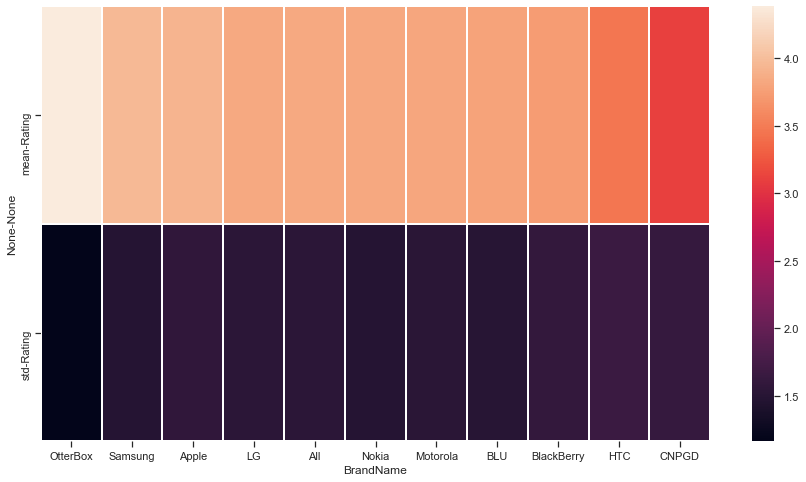

In [44]:
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
plt.subplots(figsize = (15, 8))
sns.heatmap(pivot.T,linewidths=0.2,xticklabels=True, yticklabels=True)

# Lets find out their topmost products: For 10 Brands, what are top 10 products?

In [45]:
df_small.columns.values

array(['ProductName', 'BrandName', 'Price', 'Rating', 'Reviews',
       'ReviewVotes'], dtype=object)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


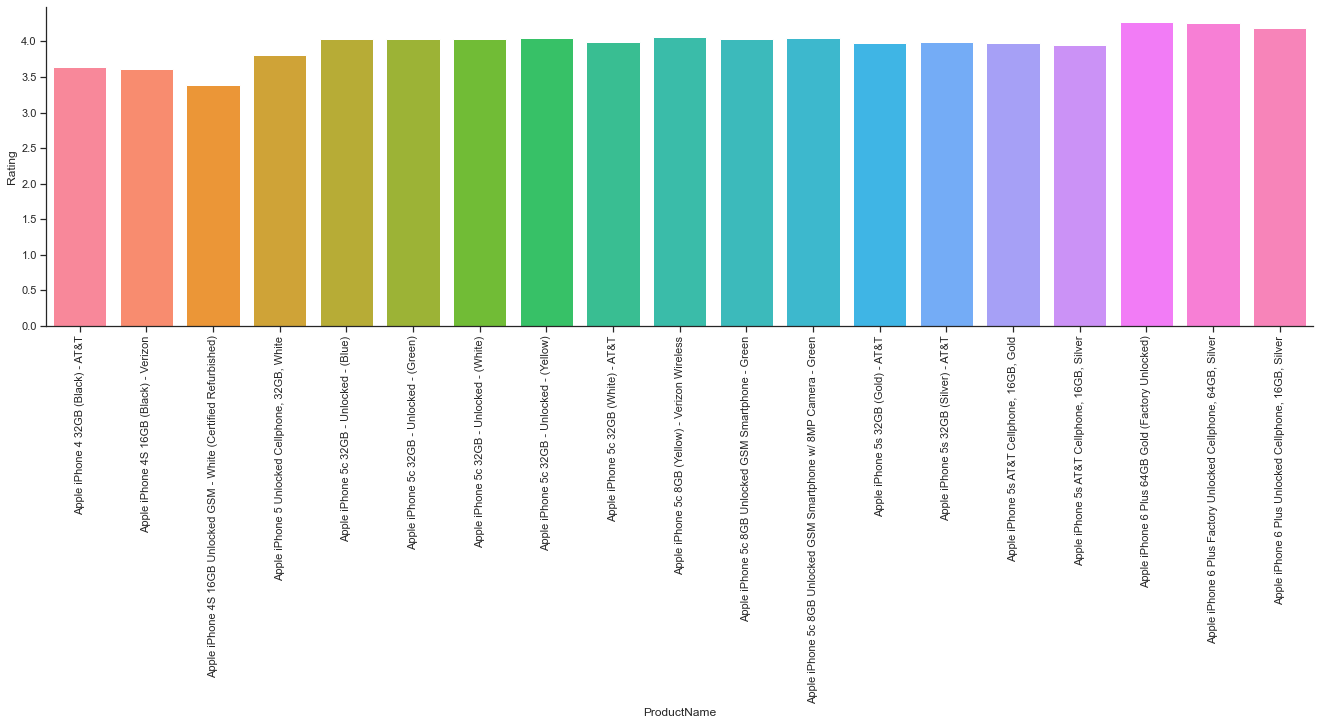

In [46]:
def plot_one_company(company, n=20):
    df_one_company = df_small.loc[df_small['BrandName'].isin([company])]
    pivot = pd.pivot_table(df_one_company,
            values = ['Rating', 'ReviewVotes'],
            index =  ['ProductName'],
                       columns= [],
                       aggfunc=[np.sum, np.mean, np.count_nonzero, np.std], 
                       margins=True, fill_value=0).sort_values(by=('count_nonzero', 'Rating'), ascending=False).fillna('')
    top_10_prods = pivot.reindex().head(n=20)
    top_10_prods = top_10_prods.reset_index()
    tt_prods = top_10_prods['ProductName']
    tt_prods2 = tt_prods.reset_index()
    top_10_prods_list = list(set(tt_prods2['ProductName']))
    #top_30_prod_list

    try:
        aa= df_one_company[df_one_company['ProductName'].isin(top_10_prods_list)]
        g = sns.factorplot(x='ProductName', 
                           y='Rating',
                           data=aa, 
                           saturation=1, 
                           kind="bar", 
                           ci=None, 
                           aspect=4, 
                           linewidth=1) 
        locs, labels = plt.xticks()
        plt.setp(labels, rotation=90)
    except: 
        pass
        
for i in top_10_brand_list:
    plot_one_company(i, 20)
    break
    

# Correlations

/var/folders/t5/9m9lvjj92gqf_0pwjzljb7xr0000gn/T/ipykernel_75110/3007583381.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corrs_mat, dtype=np.bool)


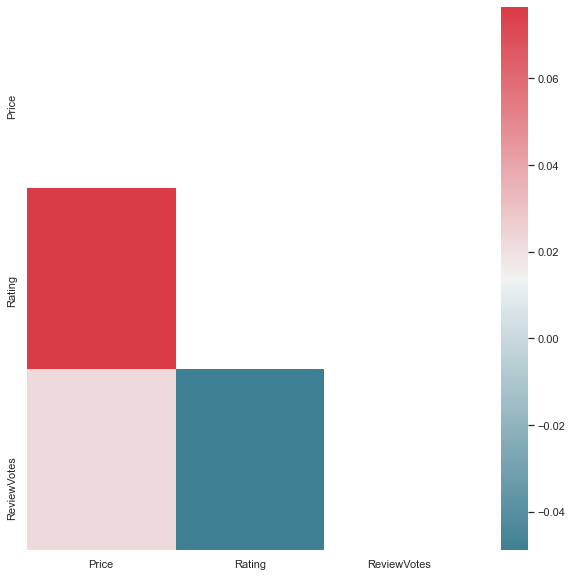

In [47]:
def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(10, 10))
    mask = np.zeros_like(corrs_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)

variable_correlations = df.corr()
#variable_correlations
heat_map(variable_correlations)

In [48]:
df.columns.values

array(['ProductName', 'BrandName', 'Price', 'Rating', 'Reviews',
       'ReviewVotes'], dtype=object)

# How the reviews of the products depends over the price and the brand name?

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


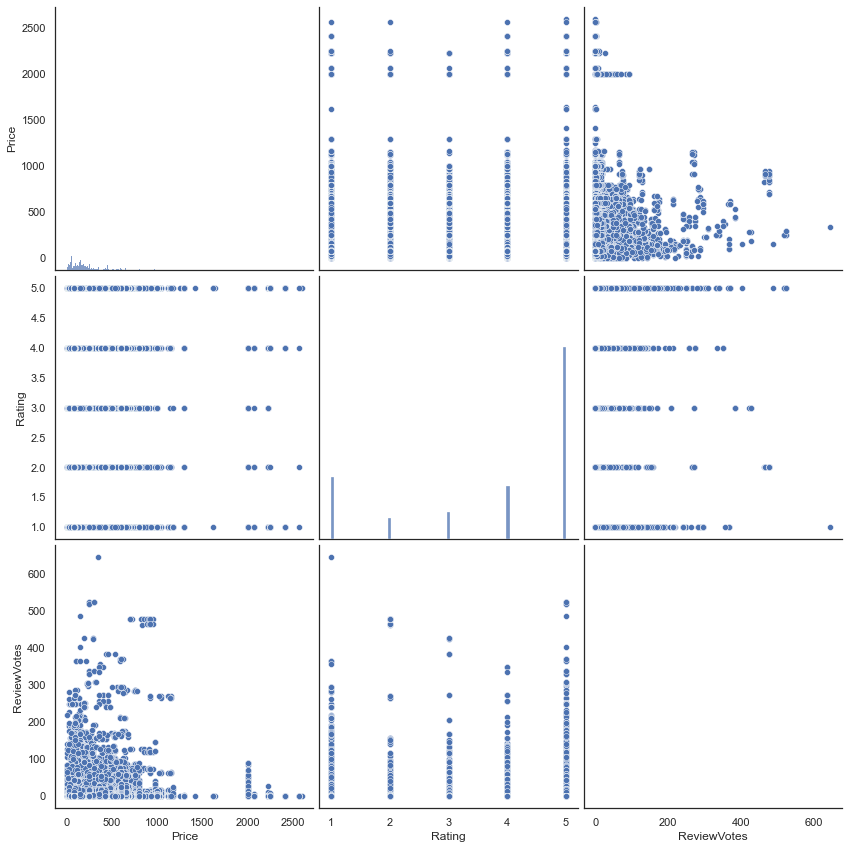

In [49]:
df_small = df[['BrandName', 
               'Price', 
               'Rating', 
               'ReviewVotes']]
sns.pairplot(df_small, size=4)

# Complex plots

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

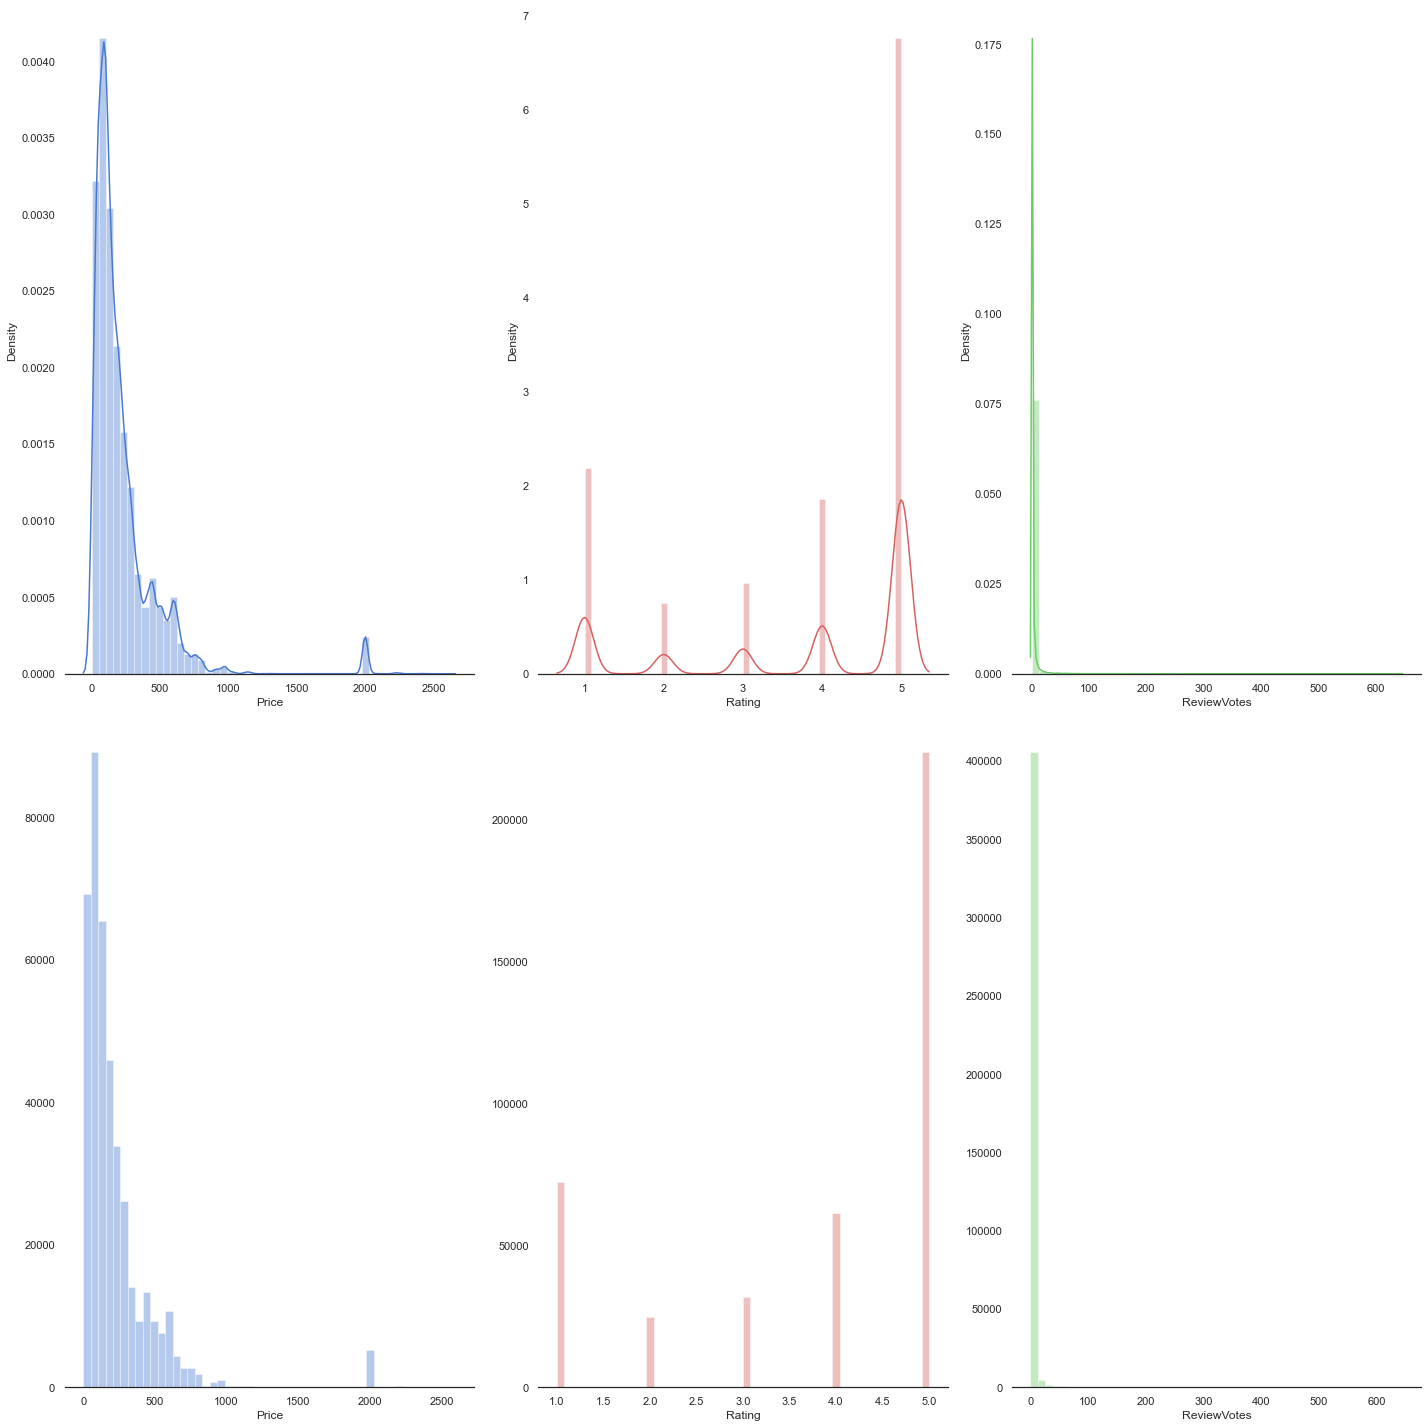

In [50]:
#data = df
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 3, figsize=(20,20))
sns.despine(left=True)
sns.distplot(df['Price'],            color="b", ax=axes[0, 0])
sns.distplot(df['Rating'],           color="r", ax=axes[0, 1])
sns.distplot(df['ReviewVotes'],      color="g", ax=axes[0, 2])
sns.distplot(df['Price'],            kde=False, color="b", ax=axes[1, 0])
sns.distplot(df['Rating'],           kde=False, color="r", ax=axes[1, 1])
sns.distplot(df['ReviewVotes'],      kde=False, color="g", ax=axes[1, 2])
#sns.distplot(df['hour'],                  kde=False, color="b", ax=axes[1, 2])
plt.tight_layout()

# Lets find out something about the products and rating of the Apple.

In [51]:
df_apple = df.loc[df['BrandName'].isin(['Apple'])]
pivot = pd.pivot_table(df_apple,
        values = ['Rating', 'ReviewVotes'],
        index =  ['ProductName'],
                   columns= [],
                   aggfunc=[np.sum, np.mean, np.count_nonzero], 
                   margins=True, fill_value=0).sort_values(by=('count_nonzero', 'Rating'), ascending=False).fillna('')
topmost_prods = pivot.reindex().head(n=30)
topmost_prods = topmost_prods.reset_index()


In [52]:
tt_brand = topmost_prods['ProductName']
tt_brand2 = tt_brand.reset_index()
top_10_prod_list = list(set(tt_brand2['ProductName']))


# Is Apple is earning more income from customer or its Samsung

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


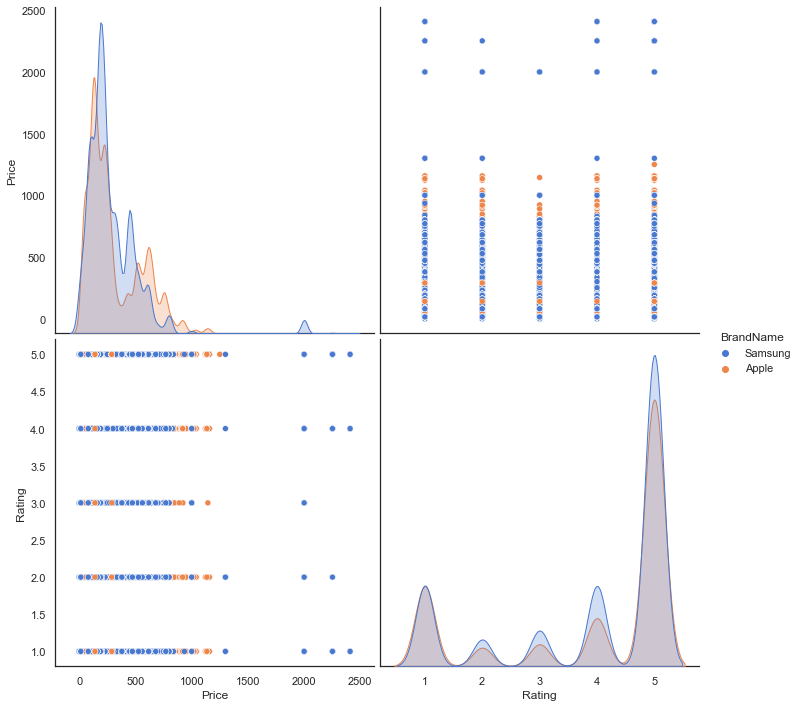

In [53]:
apple_samsumg = ['Apple', 'Samsung']
df_top_ten = df.loc[df['BrandName'].isin(apple_samsumg)]
df_small = df_top_ten[['BrandName', 
               'Price', 
               'Rating'
              ]]
sns.pairplot(df_small, hue='BrandName', size=5)